In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [2]:
from psikit import Psikit

In [3]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
pk.read_from_smiles('Cn1cnc2c1c(=O)n(C)c(=O)n2C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-676.357117481604

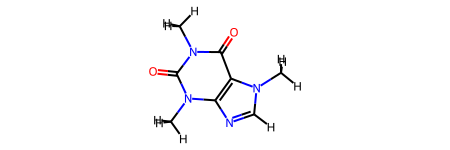

In [6]:
pk.mol

In [7]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20810005  0.06752676  0.08393882 -0.46785217  0.12070487 -0.09084139
  0.35834378 -0.49495335 -0.04696902 -0.02877601  0.37000335 -0.53027845
  0.01788338  0.01153904  0.11234478  0.11234478  0.11234478  0.17379154
  0.06012357  0.06012357  0.06012357  0.04887795  0.04887795  0.04887795]
[-0.11403338 -0.69386542  0.38638201 -0.62282334  0.6350229   0.09325507
  0.89980935 -0.63013338 -0.87906299 -0.12347224  1.09568167 -0.62726203
 -0.87748845 -0.12043552  0.16726999  0.12972951  0.16727223  0.1824131
  0.17514706  0.14565781  0.14558392  0.16748195  0.14852449  0.1493457 ]
[-0.13211906 -0.05264127  0.07837133 -0.2756179   0.14000216 -0.125261
  0.29285314 -0.39405069 -0.18759192 -0.13842823  0.347969   -0.39844375
 -0.15248975 -0.13201088  0.11679986  0.10376709  0.11774971  0.12082537
  0.12159862  0.10704074  0.10596547  0.1196341   0.1081228   0.10795504]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.208,-0.114,-0.132
1,N,0.068,-0.694,-0.053
2,C,0.084,0.386,0.078
3,N,-0.468,-0.623,-0.276
4,C,0.121,0.635,0.140
5,C,-0.091,0.093,-0.125
6,C,0.358,0.900,0.293
7,O,-0.495,-0.630,-0.394
8,N,-0.047,-0.879,-0.188
9,C,-0.029,-0.123,-0.138


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

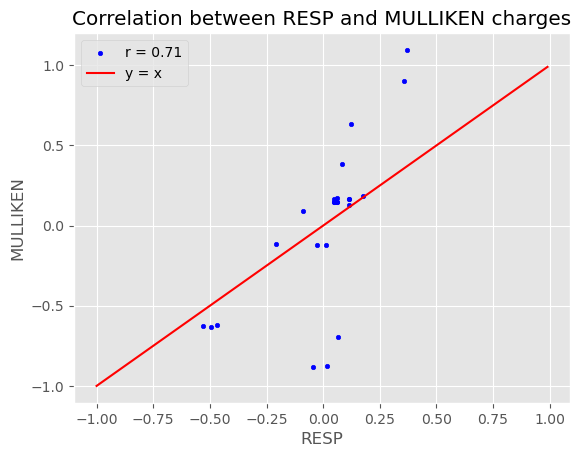

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation, _ = pearsonr(df['RESP'], df['MULLIKEN'])

# Scatter plot
plt.scatter(df.RESP, df.MULLIKEN, s=10, c='blue', label=f'r = {correlation:.2f}')
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')

# Add a y = x reference line
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='red', label='y = x')

# Add title and legend
plt.title('Correlation between RESP and MULLIKEN charges')
plt.legend()

# Show the plot
plt.show()

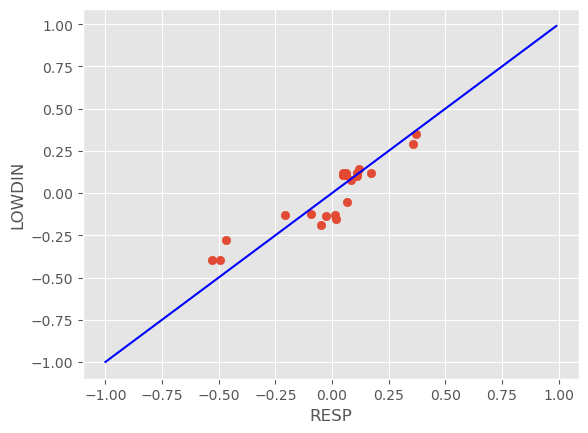

In [21]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

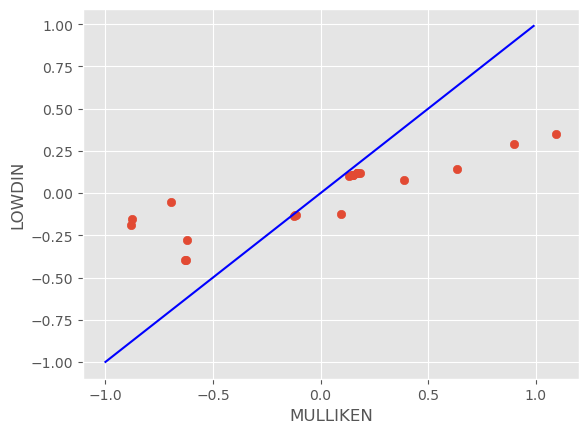

In [22]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')